# Supervised Classifications

In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib as mpl
from hdf5manager import hdf5manager as h5
from pandas import pandas as pd
from pandas import DataFrame
from skimage.measure import label, regionprops
import scipy
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage
from scipy import stats 
from scipy.ndimage.filters import gaussian_filter, convolve
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage.filters import maximum_filter
from scipy.stats import multivariate_normal as mvn
from scipy.spatial.distance import cdist
from skimage.morphology import disk, watershed
from skimage.morphology import erosion, dilation, opening, closing
from opticFlow import opticFlow as of
import colorsys
import wholeBrain as wb
from waveletAnalysis import waveletAnalysis as wave
import cv2
import os
import seaborn as sns
from time import time

Error importing slackNotify.py
	 ERROR :  No module named 'slacker'


In [2]:
path = '/Users/jcrndm/Documents/'
file = '170721_07_c1_gridOpticFlow_metrics.csv'

tsv_output_file = path + file
data = pd.DataFrame.from_csv(tsv_output_file)

data = data.astype('float64')
a = np.zeros(len(data))
a[1445:2388]=1
data['classification'] = a

/Users/jcrndm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


In [3]:
var = pd.DataFrame()

var['mov.mean'] = data['mov.mean']
# var['mov.range'] = data['mov.range']                            
# var['mov.eventrest'] = data['mov.eventrest']
var['mov.maxeventval'] = data['mov.maxeventval']
var['mov.surfarea'] = data['mov.surfarea']
# var['mov.totalmag'] = data['mov.totalmag']
# var['mov.percent'] = data['mov.percent']
# var['mov.stdx'] = data['mov.stdx']
# var['mov.stdy'] = data['mov.stdy']
var['mov.diffxystd'] = data['mov.diffxystd']        
var['mov.diffmaxevents'] = data['mov.diffmaxevents']
var['mov.percenterror'] = data['mov.percenterror']
var['brain.data'] = data['brain.data']    
# var['brain.eventrest'] = data['brain.eventrest']        
# var['brain.rangemaxmin'] = data['brain.rangemaxmin']
var['diff.brainmov'] = data['diff.brainmov']

## var['mov.std'] = data['mov.std']
## var['mov.mode'] = data['mov.mode']
## var['mov.firstder'] = data['mov.firstder']
## var['mov.secder'] = data['mov.secder']
## var['mov.timetoevent'] = data['mov.timetoevent']
## var['mov.timefromevent'] = data['mov.timefromevent']
## var['brain.firstder'] = data['brain.firstder']
## var['brain.secder'] = data['brain.secder'] 
## var['diff.brainmovfirstder'] = data['diff.brainmovfirstder']
## var['diff.brainmovsecder'] = data['diff.brainmovsecder']
## var['classification'] = data['classification']


new_vars = ["mov.mean", "mov.maxeventval", "mov.diffxystd", "mov.diffmaxevents", "mov.surfarea", "diff.brainmov", 
            "brain.data"]

chosen_vars = ["mov.mean", "mov.range", "mov.maxeventval", "mov.surfarea", "mov.totalmag", "mov.percent",
            "mov.percenterror", "mov.stdx", "mov.stdy", "mov.diffxystd", "mov.maxeventval", "brain.data",
            "brain.rangemaxmin", "diff.brainmov"]

## Gaussian Naive Bayes Classifier

In [4]:
from sklearn.metrics import confusion_matrix

X = data.loc[:, data.columns != 'mov.mean'].fillna(value=0)
y = data.loc[:,'classification'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

gnb = GaussianNB(var_smoothing= 0.25)
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print('Accuracy of Gaussian NB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))
    
print(classification_report(y_test, y_pred))

Accuracy of Gaussian NB classifier on test set: 0.95
                     not pred.          pred.
       not act.           5114              0
           act.            286              0
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      5114
         1.0       0.00      0.00      0.00       286

   micro avg       0.95      0.95      0.95      5400
   macro avg       0.47      0.50      0.49      5400
weighted avg       0.90      0.95      0.92      5400



/Users/jcrndm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcrndm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcrndm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


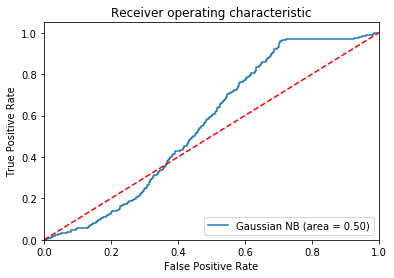

In [5]:
roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian NB (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

var.loc[X_test.index, 'gnb_prob'] = gnb.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'gnb_prob'] = gnb.predict_proba(X_train)[:,1]

## Logistic Regression

In [6]:
from sklearn.metrics import confusion_matrix

X = data.loc[:, data.columns != 'mov.mean'].fillna(value=0)
y = data.loc[:,'classification'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

logreg = LogisticRegression(C=1, solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))
    
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.95
                     not pred.          pred.
       not act.           5114              0
           act.            286              0
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      5114
         1.0       0.00      0.00      0.00       286

   micro avg       0.95      0.95      0.95      5400
   macro avg       0.47      0.50      0.49      5400
weighted avg       0.90      0.95      0.92      5400



/Users/jcrndm/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jcrndm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcrndm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcrndm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


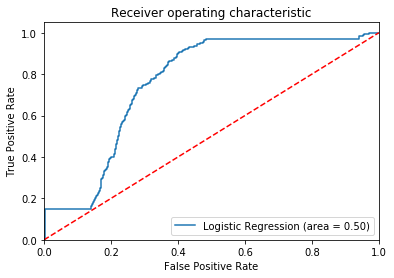

In [7]:
roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

var.loc[X_test.index, 'logreg_prob'] = logreg.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'logreg_prob'] = logreg.predict_proba(X_train)[:,1]

## Support Vector Machine

In [8]:
from sklearn.metrics import confusion_matrix

X = data.loc[:, data.columns != 'mov.mean'].fillna(value=0)
y = data.loc[:,'classification'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

svm_clf = SVC(kernel="rbf", gamma=0.01, C=50, random_state=42, probability= True)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_clf.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))
    
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set: 1.00
                     not pred.          pred.
       not act.           5114              0
           act.             13            273
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5114
         1.0       1.00      0.95      0.98       286

   micro avg       1.00      1.00      1.00      5400
   macro avg       1.00      0.98      0.99      5400
weighted avg       1.00      1.00      1.00      5400



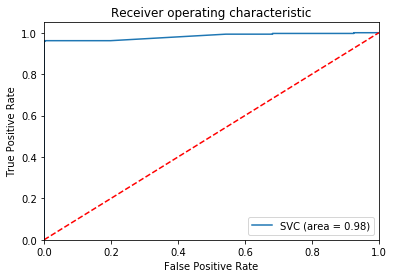

In [9]:
roc_auc = roc_auc_score(y_test, svm_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('SVM_ROC.svg')
plt.show()

var.loc[X_test.index, 'SVC_prob'] = svm_clf.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'SVC_prob'] = svm_clf.predict_proba(X_train)[:,1]

## RandomForest Classifier

In [10]:
from sklearn.metrics import confusion_matrix

X = data.loc[:, data.columns != 'mov.mean'].fillna(value=0)
y = data.loc[:,'classification'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

rnd_clf = RandomForestClassifier(n_estimators = 500, max_features = len(new_vars), random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rnd_clf.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))
    
print(classification_report(y_test, y_pred))

Accuracy of Random Forest classifier on test set: 1.00
                     not pred.          pred.
       not act.           5114              0
           act.              0            286
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5114
         1.0       1.00      1.00      1.00       286

   micro avg       1.00      1.00      1.00      5400
   macro avg       1.00      1.00      1.00      5400
weighted avg       1.00      1.00      1.00      5400



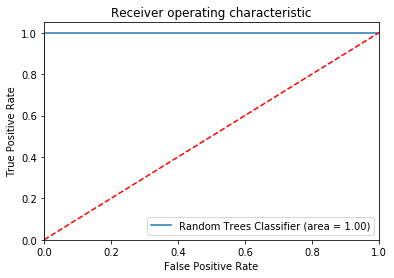

In [11]:
roc_auc = roc_auc_score(y_test, rnd_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rnd_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Trees Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('rnd_ROC.svg')
plt.show()

var.loc[X_test.index, 'rnd_clf_prob'] = rnd_clf.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'rnd_clf_prob'] = rnd_clf.predict_proba(X_train)[:,1]

## Voting Classifier

In [12]:
from sklearn.metrics import confusion_matrix

X = data.loc[:, data.columns != 'mov.mean'].fillna(value=0)
y = data.loc[:,'classification'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)


log_clf = LogisticRegression(C=1, solver = 'lbfgs', random_state = 42)
rnd_clf = RandomForestClassifier(n_estimators = 50, max_features = len(new_vars), random_state=42)
svm_clf = SVC(kernel="rbf", gamma=0.01, C=50, random_state=42, probability= True)
gnb_clf = GaussianNB(var_smoothing= 0.25)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('gnb', gnb_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

print('Accuracy of Voting classifier on test set: {:.2f}'.format(voting_clf.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))
    
print(classification_report(y_test, y_pred))

/Users/jcrndm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jcrndm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy of Voting classifier on test set: 1.00
                     not pred.          pred.
       not act.           5114              0
           act.             17            269
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5114
         1.0       1.00      0.94      0.97       286

   micro avg       1.00      1.00      1.00      5400
   macro avg       1.00      0.97      0.98      5400
weighted avg       1.00      1.00      1.00      5400



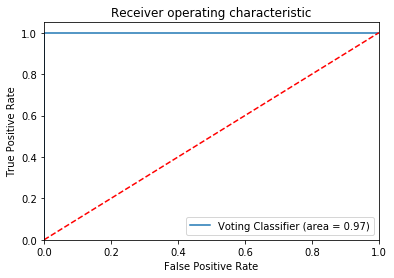

In [13]:
roc_auc = roc_auc_score(y_test, voting_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, voting_clf.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='Voting Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('rnd_ROC.svg')
plt.show()
var.loc[X_test.index, 'voting_clf_prob'] = voting_clf.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'voting_clf_prob'] = voting_clf.predict_proba(X_train)[:,1]

## ROC Curves

/Users/jcrndm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jcrndm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


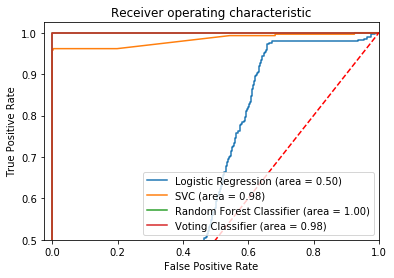

In [14]:
plt.figure()

logreg = LogisticRegression(C=1, solver='lbfgs')
logreg.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)

svm_clf = SVC(kernel="rbf", gamma=0.01, C=50, random_state=42, probability= True)
svm_clf.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, svm_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc)

rnd_clf = RandomForestClassifier(n_estimators = 500, max_features = len(new_vars), random_state=42)
rnd_clf.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, rnd_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rnd_clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % roc_auc)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, voting_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, voting_clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Voting Classifier (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.025, 1.0])
plt.ylim([.50, 1.025])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('rnd_ROC.svg')
plt.show()

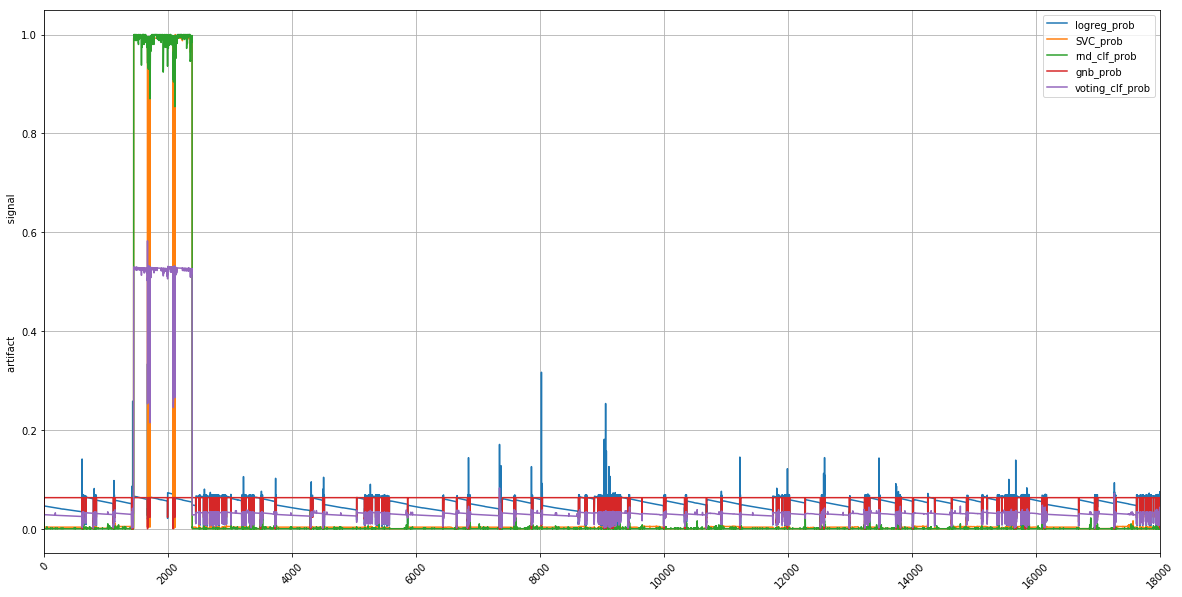

In [29]:
var.plot(y=['logreg_prob', 'SVC_prob', 'rnd_clf_prob', 'gnb_prob', 'voting_clf_prob'],
                     figsize=(20,10), rot = 45, grid=True)
plt.ylabel('artifact                                    signal')
plt.savefig(path + 'classifier_prob.png')
plt.show()

In [28]:
# mov.percent is all nans in bag set of data